### OECD 국가 16개 국가의 식품 물가 지수
 - 16개 국가
 - 오스트리아, 덴마크, 프랑스, 아이슬란드, 이탈리아, 룩셈부르크, 노르웨이, 스위스, 튀르키예, 영국, 독일, 캐나다, 미국, 일본, 호주, 대한민국
 - 
 - 16개 국가의 장보기 물가 지수 비교
    - 분석할 식품: 과일 및 채소
    - 오렌지, 사과, 양파, 바나나, 토마토, 양상추

In [59]:
# 필요한 라이브러리 & 모듈
import pymysql
import pandas as pd
import matplotlib.pylab as plt
import koreanize_matplotlib
import numpy as np

In [60]:
# 데이터 베이스에서 데이터 가져오기

# sql 연결
conn = pymysql.connect(host='172.20.49.206', user='hwang', password='1234',
                       db='sql_project', charset='utf8')

print()
cur = conn.cursor(pymysql.cursors.DictCursor)

query = """
select * from product
inner join countries
on product.country_id = countries.country_id
where product.product_id in ('ONI', 'TOM', 'ORA', 'APP', 'BAN', 'LET')
"""

cur.execute(query)
row = cur.fetchall()

data_df = pd.DataFrame(row)

cur.close()
conn.close()

In [61]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_id            96 non-null     object 
 1   country_id            96 non-null     object 
 2   product_name          96 non-null     object 
 3   product_price         96 non-null     float64
 4   countries.country_id  96 non-null     object 
 5   country_name          96 non-null     object 
 6   continent_id          96 non-null     object 
dtypes: float64(1), object(6)
memory usage: 5.4+ KB


In [62]:
data_df.head(10)

,product_id,country_id,product_name,product_price,countries.country_id,country_name,continent_id
0,APP,AUS,APPLE,0.95,AUS,Australia,OC
1,APP,AUT,APPLE,0.81,AUT,Austria,EU
2,APP,CAN,APPLE,1.25,CAN,Canada,NA
3,APP,CHE,APPLE,1.09,CHE,Switzerland,EU
4,APP,DEU,APPLE,0.86,DEU,Germany,EU
5,APP,DNK,APPLE,0.93,DNK,Denmark,EU
6,APP,FRA,APPLE,0.91,FRA,France,EU
7,APP,GBR,APPLE,0.82,GBR,United Kingdom,EU
8,APP,ISL,APPLE,0.88,ISL,Iceland,EU
9,APP,ITA,APPLE,0.68,ITA,Italy,EU


In [63]:
data_df.tail(10)

,product_id,country_id,product_name,product_price,countries.country_id,country_name,continent_id
86,TOM,FRA,TOMATO,0.72,FRA,France,EU
87,TOM,GBR,TOMATO,0.68,GBR,United Kingdom,EU
88,TOM,ISL,TOMATO,0.93,ISL,Iceland,EU
89,TOM,ITA,TOMATO,0.61,ITA,Italy,EU
90,TOM,JPN,TOMATO,0.90,JPN,Japan,AS
91,TOM,KOR,TOMATO,1.07,KOR,South Korea,AS
92,TOM,LUX,TOMATO,0.81,LUX,Luxembourg,EU
93,TOM,NOR,TOMATO,0.84,NOR,Norway,EU
94,TOM,TUR,TOMATO,0.24,TUR,Turkey,EU
95,TOM,USA,TOMATO,0.98,USA,United States of America,NA


In [64]:
# 분석에 필요없을 것으로 보여지는 컬럼은 삭제
product_df = data_df.drop(columns=['product_id', 'country_id', 'countries.country_id', 'continent_id'])
product_df

,product_name,product_price,country_name
0,APPLE,0.95,Australia
1,APPLE,0.81,Austria
2,APPLE,1.25,Canada
3,APPLE,1.09,Switzerland
4,APPLE,0.86,Germany
...,...,...,...
91,TOMATO,1.07,South Korea
92,TOMATO,0.81,Luxembourg
93,TOMATO,0.84,Norway
94,TOMATO,0.24,Turkey


In [65]:
product = product_df.set_index(['product_name', 'country_name'])

In [104]:
product
product.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 96 entries, ('APPLE', 'Australia') to ('TOMATO', 'United States of America')
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_price  96 non-null     float64
dtypes: float64(1)
memory usage: 4.0+ KB


In [67]:
product.loc['APPLE']

,product_price
country_name,
Australia,0.95
Austria,0.81
Canada,1.25
Switzerland,1.09
Germany,0.86
Denmark,0.93
France,0.91
United Kingdom,0.82
Iceland,0.88


In [68]:
product.index

MultiIndex([(  'APPLE',                'Australia'),
            (  'APPLE',                  'Austria'),
            (  'APPLE',                   'Canada'),
            (  'APPLE',              'Switzerland'),
            (  'APPLE',                  'Germany'),
            (  'APPLE',                  'Denmark'),
            (  'APPLE',                   'France'),
            (  'APPLE',           'United Kingdom'),
            (  'APPLE',                  'Iceland'),
            (  'APPLE',                    'Italy'),
            (  'APPLE',                    'Japan'),
            (  'APPLE',              'South Korea'),
            (  'APPLE',               'Luxembourg'),
            (  'APPLE',                   'Norway'),
            (  'APPLE',                   'Turkey'),
            (  'APPLE', 'United States of America'),
            ( 'BANANA',                'Australia'),
            ( 'BANANA',                  'Austria'),
            ( 'BANANA',                   'Can

In [69]:
# 너무 길어...
product_name_list = data_df['product_name'].unique().tolist()
country_list = data_df['country_name'].unique().tolist()
print(product_name_list, country_list, sep='\n')

['APPLE', 'BANANA', 'LETTUCE', 'ONION', 'ORANGE', 'TOMATO']
['Australia', 'Austria', 'Canada', 'Switzerland', 'Germany', 'Denmark', 'France', 'United Kingdom', 'Iceland', 'Italy', 'Japan', 'South Korea', 'Luxembourg', 'Norway', 'Turkey', 'United States of America']


- 어떤 그래프를 그릴까?
- 나라별로 분석을 해야하나? 전체적으로 해야하나...
- 평균값을 넣어야하나...

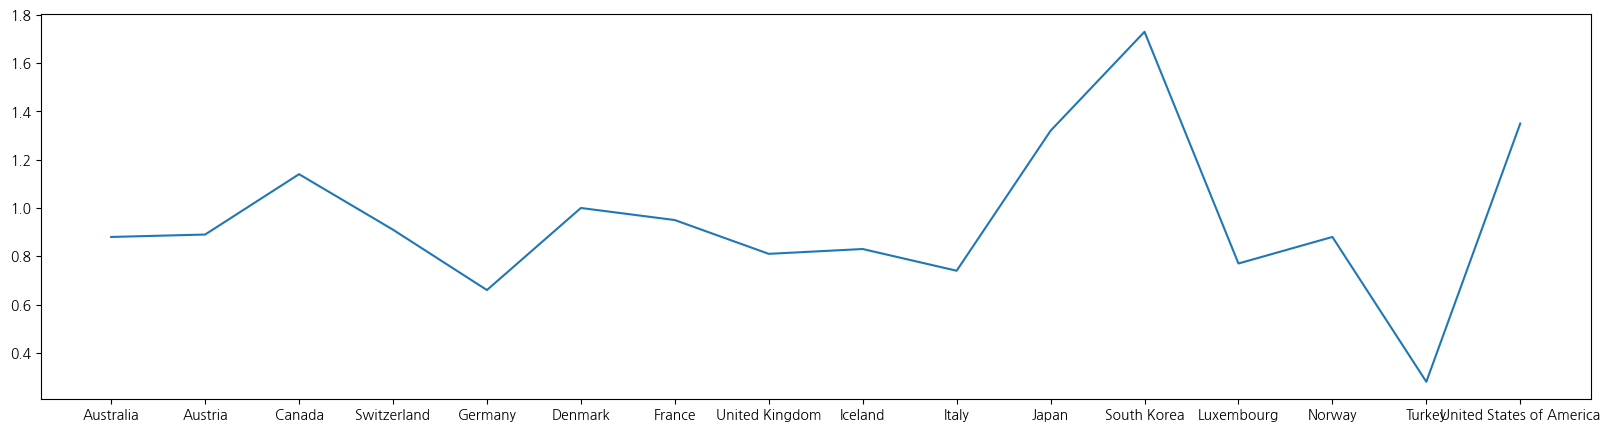

In [70]:
# 임의의 그래프를 하나 그려볼까?
plt.figure(figsize=(20, 5))
plt.plot(product.loc[product_name_list[4]])

plt.show()

In [190]:
def draw_prod(y_data, label_list):
    plt.figure(figsize=(20,5))
    
    for i in range(len(label_list)):
        plt.plot(y_data.loc[label_list[i]], 'o-', label=label_list[i])
    
    plt.legend()
    plt.title('OECD 16개국의 과일 및 채소 물가 지수', fontsize=15)
    plt.ylabel('물가 지수 ($)', fontsize=10)
    plt.xlabel('OECD 16개국', fontsize=10)
    plt.xticks(np.arange(len(country_list)), rotation=45)
    plt.show()
    

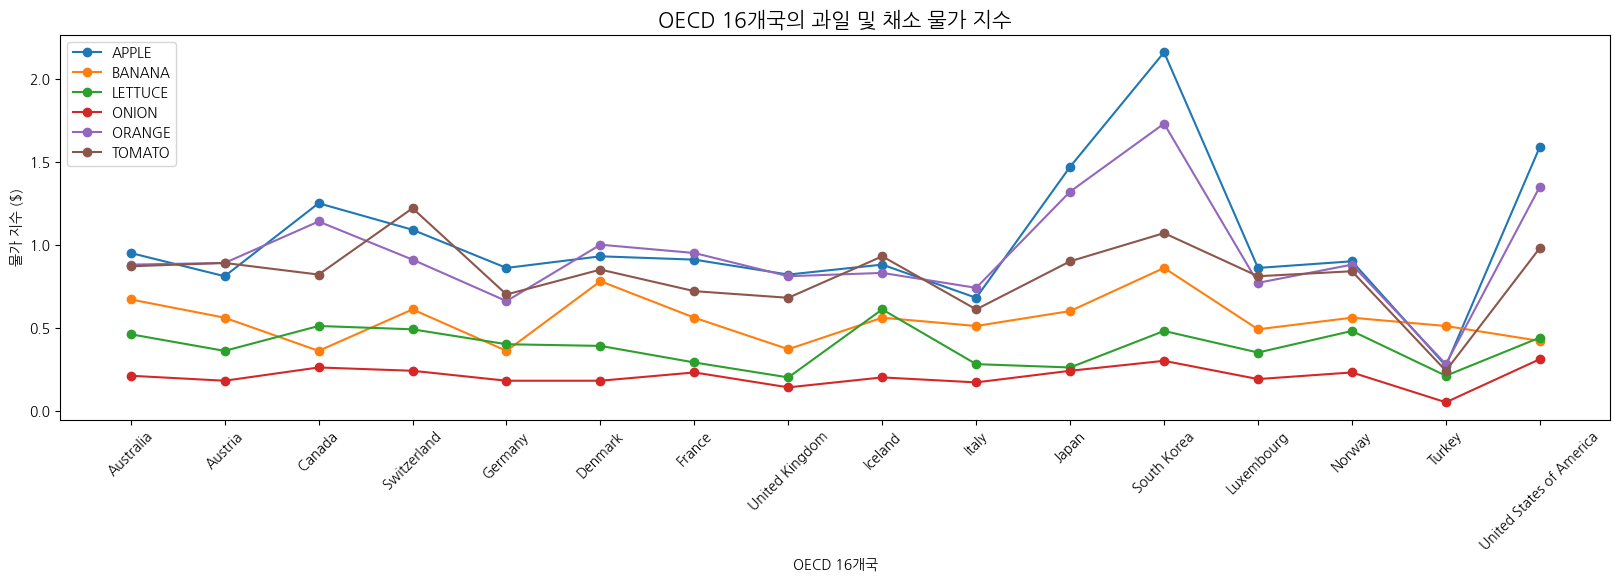

In [191]:
draw_prod(product, product_name_list)

- 뭘 기준으로 bar로 그리지?
- 나라별로 그래프를 그리는게 맞나?
- 데이터를 나눠야하나?
- 
- 
- 나라 리스트를 만들고 비교를 해볼까?
- 그러면 bar를 그릴 수 있을까?
- 무슨 나라를 리스트에 넣을건데?
    - South Korea, Japan, United States of America, Canada, Switzerland
- 
- 
- 일단은 그래프 그리고 생각해볼까?

In [93]:
select_country_list = ['South Korea', 'Japan', 'United States of America', 'Canada', 'Switzerland']
# product_name_list는 위에 선언해둔 것을 그대로 사용할 것임

In [185]:
def draw_select_bar(select_list, y_data, label_list, title):
    plt.figure(figsize=(12, 10))
    width = 0.1
    multiplier = 0
    
   
    for i in range(len(label_list)):
        offset = width * multiplier
        carry = []
        for j in range(len(select_list)):
            carry.append(y_data.loc[(label_list[i], select_list[j]), 'product_price'])
        
        bars = plt.bar(np.arange(len(select_list))+offset, carry, width, label=label_list[i])
        
        # bar에 값을 추가하기
        for bar in bars:
            y_val = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2.0, y_val, f'{y_val:.2f}', va='bottom', ha='center')

        multiplier += 1
            
    plt.title(title, fontsize=16)
    plt.ylabel('물가 지수 ($)', fontsize=16)
    plt.xlabel('국가', fontsize=16)
    plt.xticks(np.arange(len(select_list)), select_list, rotation = 10)
    plt.legend(loc='upper right', ncol=3)
    plt.tight_layout()
    plt.show()



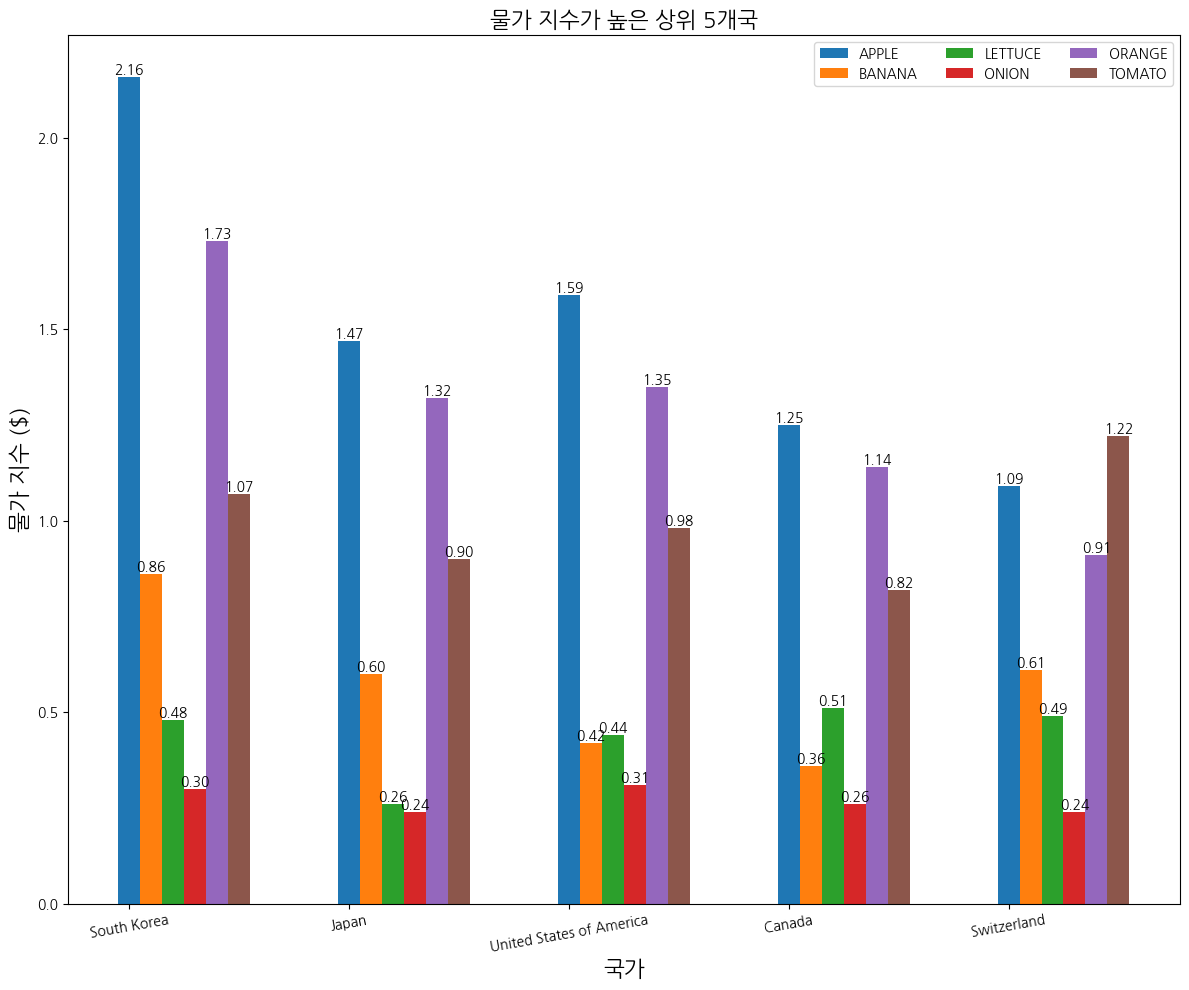

In [186]:
draw_select_bar(select_country_list, product, product_name_list, '물가 지수가 높은 상위 5개국')

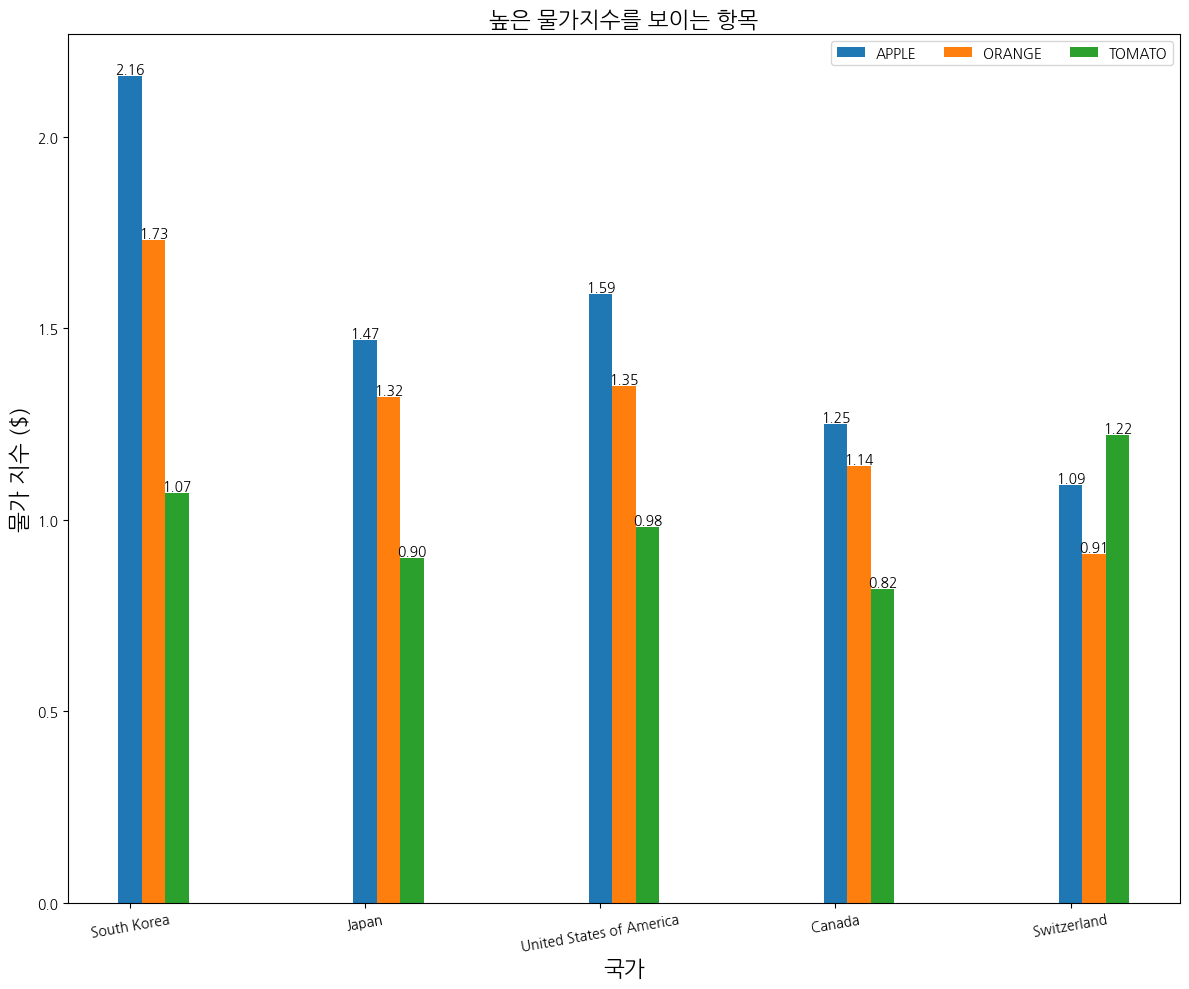

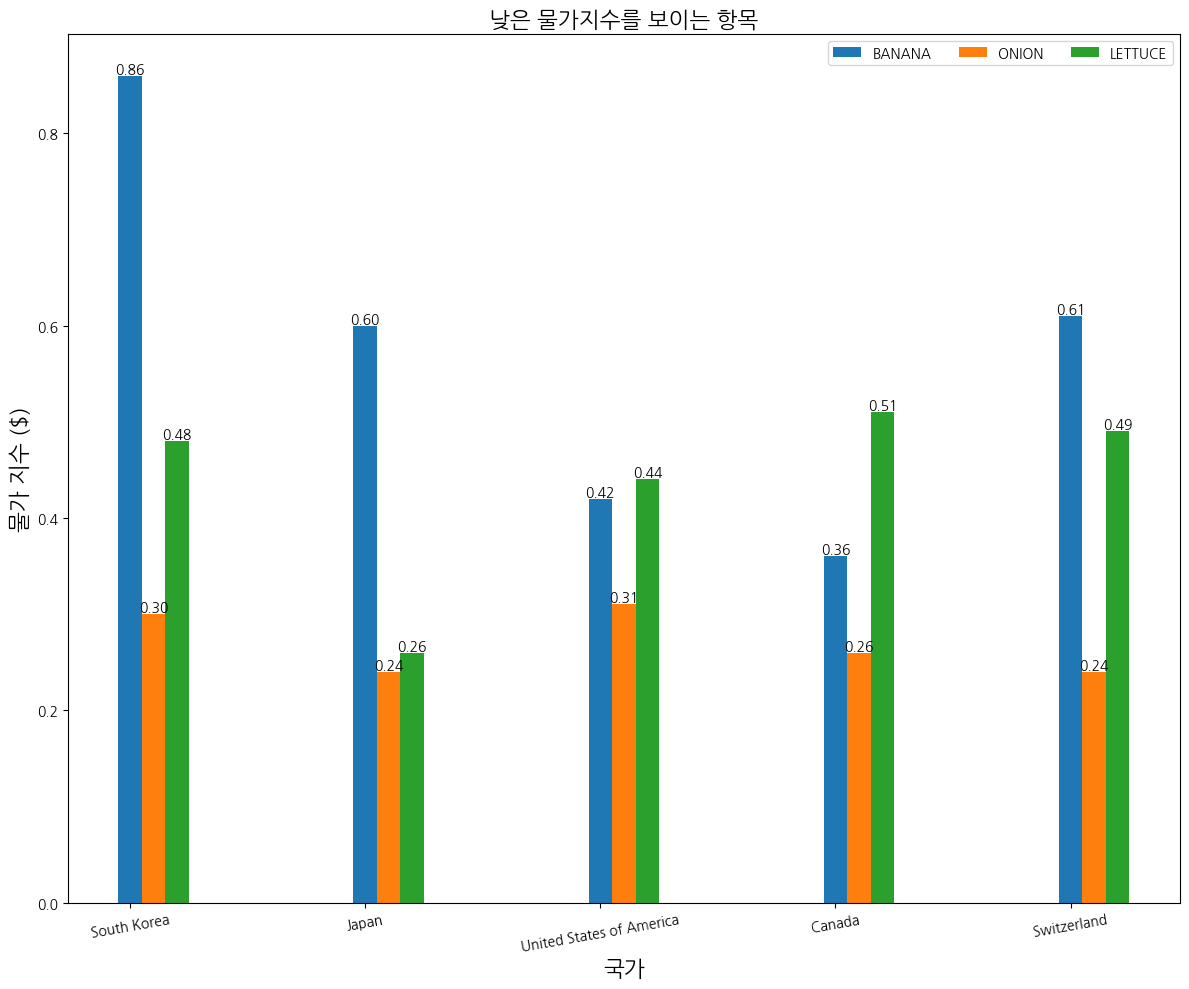

In [187]:
upper_product_list = ['APPLE', 'ORANGE', 'TOMATO']
upper_title = '높은 물가지수를 보이는 항목'
lower_product_list = ['BANANA', 'ONION', 'LETTUCE']
lower_title = '낮은 물가지수를 보이는 항목'

draw_select_bar(select_country_list, product, upper_product_list, upper_title)
draw_select_bar(select_country_list, product, lower_product_list, lower_title)

##### 찾아야하는 supporting 자료!!
- 상위 5개국(South Korea, Japan, United States of America, Canada, Switzerlan)의 물가지수가 높은 이유
- 높은 물가 지수를 보이는 항목(APPLE, ORANGE, TOMATO)의 이유
- Turkey는 왜 물가 지수가 낮은가?
- 
- 
- 정리해야하는 결론: 왜 그런 물가 지수를 보이는가?